**PROGRAM EXERCISE: SENTIMENT ANALYSIS ON MOVIE REVIEWS**

Problem Statement:

You are given a dataset of movie reviews. Each review is labeled as either positive (1) or negative (0). Your task is to build a binary classification model that predicts the sentiment of a review based on its text content.
The task is to train an NLP model (e.g., logistic regression, LSTM, BERT) that can generalize to unseen reviews and accurately classify them as positive or negative.


Input:

•	Text of a movie review (e.g., "The movie was absolutely fantastic and heartwarming.")

Output:

•	Binary sentiment label:
o	1 for positive sentiment
o	0 for negative sentiment

Example Data:

Review Text	- Sentiment

"The movie was amazing, I loved the acting!"	- 1

"It was a boring and predictable plot."	- 0

"Fantastic visuals and a gripping storyline."	- 1

"Worst movie I've seen this year."	- 0


LSTM (Binary Class)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
texts = [
    "The movie was amazing, I loved the acting!",
    "It was a boring and predictable plot.",
    "Fantastic visuals and a gripping storyline.",
    "Worst movie I've seen this year.",
    "This film was a masterpiece of storytelling, with breathtaking visuals and truly unforgettable performances. I was completely immersed from start to finish.",
    "Disappointing from beginning to end. The plot was nonsensical, the acting was wooden, and the special effects were laughably bad.",
    "Absolutely brilliant! The director crafted a suspenseful thriller that kept me on the edge of my seat the entire time. A must-watch!",
    "A complete waste of time and money. The movie was boring, predictable, and felt like it dragged on forever. I couldn't wait for it to be over.",
    "A heartwarming and hilarious comedy that will leave you smiling long after the credits roll. The chemistry between the leads was perfect.",
    "Terrible dialogue and an uninspired story. This supposed comedy failed to land a single joke. Avoid at all costs."
]
labels = [1, 0, 1, 0,1,0,1,0,1,0]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences)
y = np.array(labels)
vocab_size = len(tokenizer.word_index) + 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=8, input_length=X.shape[1]),
    LSTM(16),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
model.summary()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6250 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6950
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7500 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.7500 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8750 - loss: 0.6890 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8750 - loss: 0.6879 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8750 - loss: 0.6868 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 1.0000 - loss: 0.6856 - val_accuracy: 0.5000 - val_loss: 0.6964
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 1.0000 - loss: 0.6844 - val_accuracy: 0.5000 - val_loss: 0.

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 27, 8)          │           848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,397 (28.90 KB)

 Trainable params: 2,465 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,932 (19.27 KB)

In [ ]:
test_text = ["The movie was absolutely fantastic and heartwarming."]
test_sequence = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_sequence, maxlen=X.shape[1])

prediction  = model.predict(test_padded)
print(f"Prediction: {prediction[0][0]:.4f}")

predicted_class = (prediction > 0.5).astype(int)
print(f"Predicted Class: {predicted_class[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Prediction: 0.5020
Predicted Class: 1


LSTM (Three Class- positive, negative , neutral)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
texts = [
    "The movie was amazing, I loved the acting!",
    "The acting was decent, but the story didn't really grab me.",
    "It was a boring and predictable plot.",
    "The movie had an interesting premise, but the execution was average.",
    "Fantastic visuals and a gripping storyline.",
    "Worst movie I've seen this year.",
    "The acting was decent, but the story didn't really grab me.",
    "This film was a masterpiece of storytelling, with breathtaking visuals and truly unforgettable performances. I was completely immersed from start to finish.",
    "Disappointing from beginning to end. The plot was nonsensical, the acting was wooden, and the special effects were laughably bad.",
    "It was an okay film, nothing spectacular but not bad either.",
    "Absolutely brilliant! The director crafted a suspenseful thriller that kept me on the edge of my seat the entire time. A must-watch!",
    "A complete waste of time and money. The movie was boring, predictable, and felt like it dragged on forever. I couldn't wait for it to be over.",
    "The movie was watchable, but it didn't leave a strong impression.",
    "A heartwarming and hilarious comedy that will leave you smiling long after the credits roll. The chemistry between the leads was perfect.",
    "Terrible dialogue and an uninspired story. This supposed comedy failed to land a single joke. Avoid at all costs.",
    "The movie had an interesting premise, but the execution was average.",

]
labels = [1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences)
y = np.array(labels)
vocab_size = len(tokenizer.word_index) + 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=8, input_length=X.shape[1]),
    LSTM(16),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
model.summary()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5714 - loss: 1.0968 - val_accuracy: 0.0000e+00 - val_loss: 1.0988
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5000 - loss: 1.0952 - val_accuracy: 0.0000e+00 - val_loss: 1.0989
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5000 - loss: 1.0936 - val_accuracy: 0.5000 - val_loss: 1.0990
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5714 - loss: 1.0920 - val_accuracy: 0.5000 - val_loss: 1.0991
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5714 - loss: 1.0904 - val_accuracy: 0.5000 - val_loss: 1.0992
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.5714 - loss: 1.0887 - val_accuracy: 0.5000 - val_loss: 1.0994
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5714 - loss: 1.0869 - val_accuracy: 0.5000 - val_loss: 1.0995
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7143 - loss: 1.0851 - val_accuracy: 0.5000 - val_

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 27, 8)          │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,931 (30.98 KB)

 Trainable params: 2,643 (10.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,288 (20.66 KB)

In [ ]:
test_text = ["It was a straightforward story, well-told but not particularly innovative."]
test_sequence = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_sequence, maxlen=X.shape[1])

prediction  = model.predict(test_padded)
print(f"Prediction: {prediction[0]}")

predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted Class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Prediction: [0.33799964 0.31469676 0.34730357]
Predicted Class: 2


BERT (Binary Class)

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Layer
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np


In [ ]:
texts = [
    "The movie was amazing, I loved the acting!",
    "It was a boring and predictable plot.",
    "Fantastic visuals and a gripping storyline.",
    "Worst movie I've seen this year.",
    "This film was a masterpiece of storytelling, with breathtaking visuals and truly unforgettable performances. I was completely immersed from start to finish.",
    "Disappointing from beginning to end. The plot was nonsensical, the acting was wooden, and the special effects were laughably bad.",
    "Absolutely brilliant! The director crafted a suspenseful thriller that kept me on the edge of my seat the entire time. A must-watch!",
    "A complete waste of time and money. The movie was boring, predictable, and felt like it dragged on forever. I couldn't wait for it to be over.",
    "A heartwarming and hilarious comedy that will leave you smiling long after the credits roll. The chemistry between the leads was perfect.",
    "Terrible dialogue and an uninspired story. This supposed comedy failed to land a single joke. Avoid at all costs."
]
labels = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])


In [ ]:
texts_train, texts_test, y_train, y_test = train_test_split(texts, labels, test_size=0.1, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(texts_train, truncation=True, padding='max_length', max_length=128, return_tensors='tf')
test_encodings = tokenizer(texts_test, truncation=True, padding='max_length', max_length=128, return_tensors='tf')

class BERTLayer(Layer):
    def __init__(self, **kwargs):
        super(BERTLayer, self).__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained('bert-base-uncased')

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return output.pooler_output

input_ids = Input(shape=(128,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(128,), dtype=tf.int32, name="attention_mask")

bert_output = BERTLayer()([input_ids, attention_mask])
x = Dropout(0.3)(bert_output)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer=Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    [train_encodings['input_ids'], train_encodings['attention_mask']],
    y_train,
    validation_data=([test_encodings['input_ids'], test_encodings['attention_mask']], y_test),
    epochs=10,
    batch_size=4
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.4410 - loss: 0.8018 - val_accuracy: 0.0000e+00 - val_loss: 0.7481
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.2986 - loss: 0.7850 - val_accuracy: 0.0000e+00 - val_loss: 0.7516
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7083 - loss: 0.6245 - val_accuracy: 0.0000e+00 - val_loss: 0.7554
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5903 - loss: 0.7552 - val_accuracy: 0.0000e+00 - val_loss: 0.7605
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7396 - loss: 0.6393 - val_accuracy: 0.0000e+00 - val_loss: 0.7651
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3229 - loss: 0.8286 - val_accuracy: 0.0000e+00 - val_loss: 0.7688
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.6771 - loss: 0.6275 - val_accuracy: 0.0000e+00 - val_loss: 0.7722
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5278 - loss: 0.7453 - val_accuracy: 0.0000e+00

In [ ]:
test_text = ["The movie was absolutely fantastic and heartwarming."]
test_input = tokenizer(test_text, return_tensors='tf', padding='max_length', truncation=True, max_length=128)
prediction = model.predict([test_input['input_ids'], test_input['attention_mask']])
print(f"Prediction Score: {prediction[0][0]:.4f}")
print(f"Predicted Class: {int(prediction[0][0] > 0.5)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction Score: 0.6276
Predicted Class: 1


BERT (Multiclass Classification)

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, Layer
from tensorflow.keras.optimizers import Adam


In [ ]:
texts = [
    "The movie was amazing, I loved the acting!",
    "The acting was decent, but the story didn't really grab me.",
    "It was a boring and predictable plot.",
    "The movie had an interesting premise, but the execution was average.",
    "Fantastic visuals and a gripping storyline.",
    "Worst movie I've seen this year.",
    "The acting was decent, but the story didn't really grab me.",
    "This film was a masterpiece of storytelling, with breathtaking visuals and truly unforgettable performances. I was completely immersed from start to finish.",
    "Disappointing from beginning to end. The plot was nonsensical, the acting was wooden, and the special effects were laughably bad.",
    "It was an okay film, nothing spectacular but not bad either.",
    "Absolutely brilliant! The director crafted a suspenseful thriller that kept me on the edge of my seat the entire time. A must-watch!",
    "A complete waste of time and money. The movie was boring, predictable, and felt like it dragged on forever. I couldn't wait for it to be over.",
    "The movie was watchable, but it didn't leave a strong impression.",
    "A heartwarming and hilarious comedy that will leave you smiling long after the credits roll. The chemistry between the leads was perfect.",
    "Terrible dialogue and an uninspired story. This supposed comedy failed to land a single joke. Avoid at all costs.",
    "The movie had an interesting premise, but the execution was average.",

]
labels = [1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2]

In [ ]:
texts_train, texts_test, y_train, y_test = train_test_split(texts, labels, test_size=0.1, random_state=42)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(texts_train, truncation=True, padding='max_length', max_length=128, return_tensors='tf')
test_encodings = tokenizer(texts_test, truncation=True, padding='max_length', max_length=128, return_tensors='tf')


class BERTLayer(Layer):
    def __init__(self, **kwargs):
        super(BERTLayer, self).__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained('bert-base-uncased')

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return output.pooler_output


input_ids = Input(shape=(128,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(128,), dtype=tf.int32, name="attention_mask")

bert_output = BERTLayer()([input_ids, attention_mask])
x = Dropout(0.3)(bert_output)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=[input_ids, attention_mask], outputs=output)


model.compile(optimizer=Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


train_input_ids = train_encodings['input_ids'].numpy()
train_attention_mask = train_encodings['attention_mask'].numpy()
test_input_ids = test_encodings['input_ids'].numpy()
test_attention_mask = test_encodings['attention_mask'].numpy()


model.fit(
    {'input_ids': train_input_ids, 'attention_mask': train_attention_mask},
    np.array(y_train),
    validation_data=({'input_ids': test_input_ids, 'attention_mask': test_attention_mask}, np.array(y_test)),
    epochs=10,
    batch_size=4
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.3107 - loss: 1.2057 - val_accuracy: 0.5000 - val_loss: 0.9987
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6607 - loss: 1.0850 - val_accuracy: 0.5000 - val_loss: 0.9970
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5619 - loss: 1.0665 - val_accuracy: 0.5000 - val_loss: 0.9953
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2810 - loss: 1.2479 - val_accuracy: 0.5000 - val_loss: 0.9937
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4262 - loss: 1.2864 - val_accuracy: 0.5000 - val_loss: 0.9954
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3512 - loss: 1.2325 - val_accuracy: 0.5000 - val_loss: 0.9964
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5702 - loss: 0.9524 - val_accuracy: 0.5000 - val_loss: 0.9971
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3560 - loss: 1.2198 - val_accuracy: 0.5000 - val_loss: 0.9973
Epoch 9/10
4/

In [ ]:

loss, accuracy = model.evaluate(
    {'input_ids': test_input_ids, 'attention_mask': test_attention_mask},
    np.array(y_test),
    verbose=0
)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


model.summary()

Test Loss: 0.9996
Test Accuracy: 0.5000


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_6        │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (BERTLayer)         │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 768)       │          0 │ bert_layer_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 3)         │      2,307 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,923 (27.05 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,616 (18.04 KB)

In [ ]:

test_text = ["It was a straightforward story, well-told but not particularly innovative."]
test_enc = tokenizer(
    test_text,
    return_tensors='tf',
    truncation=True,
    padding='max_length',
    max_length=128
)


prediction = model.predict({
    'input_ids': test_enc['input_ids'].numpy(),
    'attention_mask': test_enc['attention_mask'].numpy()
})
print(f"Prediction (softmax probabilities): {prediction[0]}")
print(f"Predicted Class: {np.argmax(prediction)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction (softmax probabilities): [0.27024668 0.24770105 0.48205227]
Predicted Class: 2


Convert English text to IPA using phonemizer.

In [ ]:
!pip install phonemizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 23.1 MB/s eta 0:00:00


In [ ]:
!sudo apt-get update
!sudo apt-get install espeak-ng

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,742 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,246 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packa

In [ ]:
from phonemizer import phonemize

text = "natural language processing"
ipa = phonemize(text, language='en-us', backend='espeak')
print("IPA:", ipa)

IPA: nætʃɚɹəl læŋɡwɪdʒ pɹɑːsɛsɪŋ 


Acoustic

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y, sr = librosa.load(librosa.ex('trumpet'))

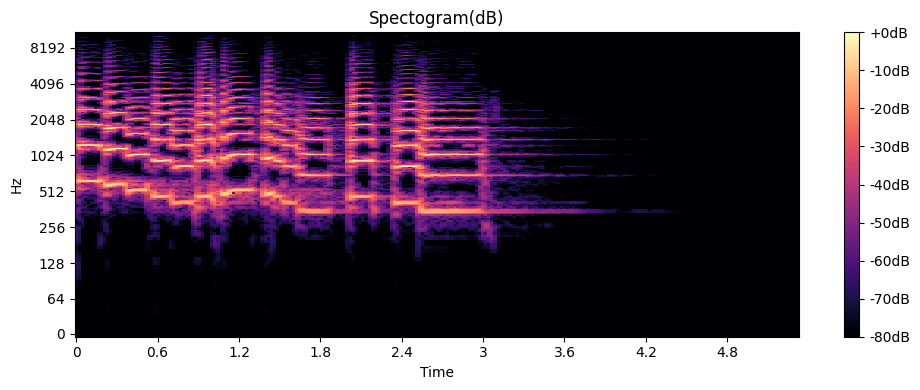

In [ ]:
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram(dB)')
plt.colorbar(format='%+2.0fdB')
plt.tight_layout()
plt.show()

In [ ]:
y, sr = librosa.load(librosa.ex('robin'))

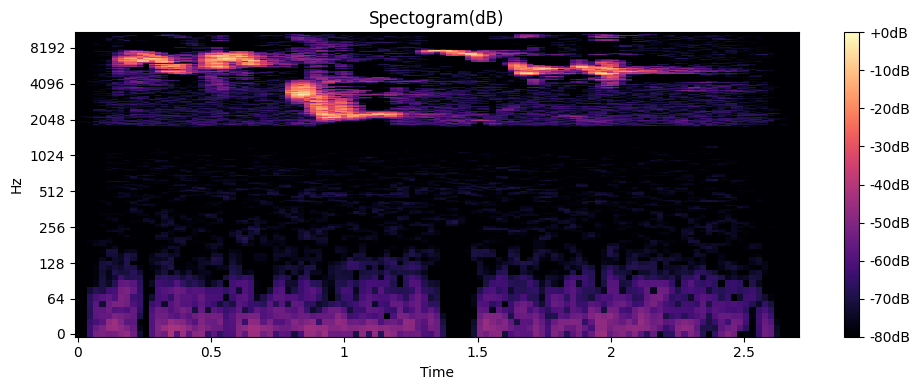

In [ ]:
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram(dB)')
plt.colorbar(format='%+2.0fdB')
plt.tight_layout()
plt.show()

In [ ]:
y, sr = librosa.load(librosa.ex('pistachio'))

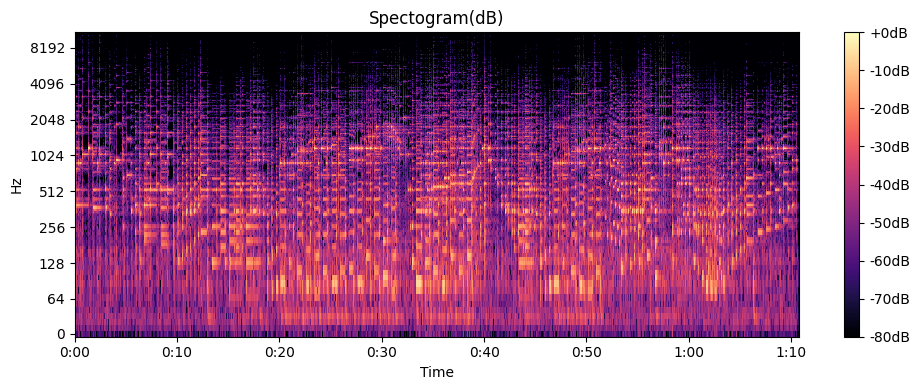

In [ ]:
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram(dB)')
plt.colorbar(format='%+2.0fdB')
plt.tight_layout()
plt.show()

In [ ]:
y, sr = librosa.load(librosa.ex('sweetwaltz'))

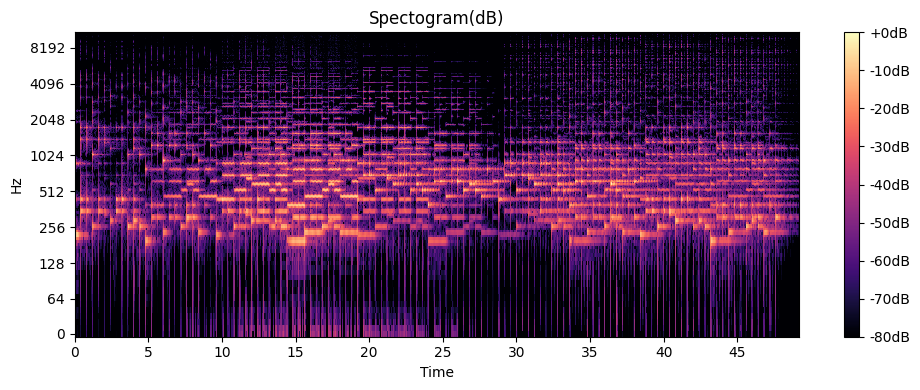

In [ ]:
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram(dB)')
plt.colorbar(format='%+2.0fdB')
plt.tight_layout()
plt.show()